# Uge 4: Spektralsætningen, diagonalisering og Hermitiske matricer
Demo af Christian Mikkelstrup, Hans Henrik Hermansen, Magnus Troen, Karl Johan Måstrup Kristensen og Jakob Lemvig

In [1]:
from sympy import *
from dtumathtools import *
init_printing()

## Symmetriske og Hermitiske matricer

I SymPy kan matricer checkes for symmetri og Hermetiske egenskaber:

1) Enten ved enten simuleret håndregning:

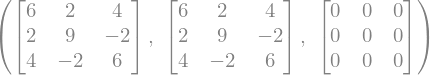

In [2]:
A = Matrix([[6,2,4],[2,9,-2],[4,-2,6]])
A, A.T, A - A.T

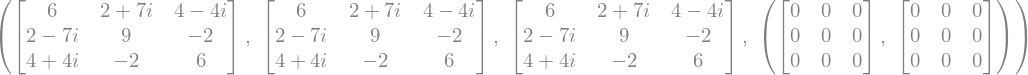

In [3]:
B = Matrix([[6,2+7*I,4-4*I],[2-7*I,9,-2],[4+4*I,-2,6]])
B, B.adjoint(), B.H, (B - B.adjoint(), B - B.H) # A.H and A.adjoint() returns the same output in python

*Bemærk* at fordi matricen konjugeres i operationen $\verb|B.H| := B^*$ fordi $B^* = \bar B ^ T$, kan en hermitisk matrix ikke have komplekse tal i diagonalen.

2) Eller ved brug af `SymPy` funktionerne:

In [4]:
# For A
A.is_symmetric(), A.is_hermitian

(True, True)

In [5]:
# For B
B.is_symmetric(), B.is_hermitian

(False, True)

Vær her opmærksom på at $\verb|.is_symmetric()|$ er en funktion og skal benyttes ***MED*** parenteser efter, og $\verb|.is_hermitian|$ benyttes ***UDEN*** parenteser. Dette er en mindre særhed i SymPy. Uden at gå for meget i dybden har det noget at gøre med hvilke informationer der er regnet på forhånd og gemt af SymPy og hvilke der ikke er. Heldigvis kan man altid prøve sig frem:

In [6]:
# A.is_symmetric

Her står der at det vi prøver at udføre er en "bound method", altså en **funktion**. Derfor skal parenteserne tilføjes:

In [7]:
A.is_symmetric()

True

Det er sjældent nødvendigt at bruge `.is_symmetric()`, da man jo ofte kan afgøre om en matrix er symmetrisk ved at kigge på den. Endelig kan man tjekke om definitionen på en symmetrisk matrix er opfyldt direkte, nemlig om $A = A^T$. I Python:

In [8]:
A == A.T

True

## Spektralsætningen

Spektralsætningen giver et godt eksempel på hvorfor hermitiske (og reelt symmetriske) matricer er så utroligt praktiske. Særligt når det kommer til diagonalisering.

Betragt for eksempel den reelle og symmetriske matrix

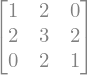

In [9]:
A = Matrix([[1,2,0],
            [2,3,2],
            [0,2,1]])
A

Først finder vi egenvektorerne

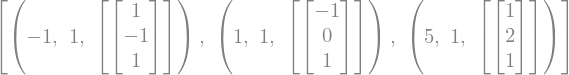

In [10]:
ev = A.eigenvects()
ev

Da vi har 3 egenværdier der alle opfylder $am(\lambda) = gm(\lambda) = 1$ kan vi bruge Corollary 2.8.6 til let at diagonalisere ${A}$ ved

\begin{equation*}
{\Lambda} = {Q}^T {A} {Q}.
\end{equation*}

Hvor ${Q}$ er en ortogonal matrix, bestående af egenvektorer for ${A}$.

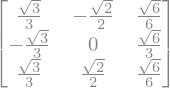

In [11]:
Q = Matrix.hstack(*[ev[i][2][0].normalized() for i in range(3)])
Q

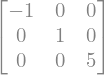

In [12]:
# Undgå at bruge lambda som variabelnavn, da det er et reserveret ord i python brug lamda i stedet
lamda = Q.T*A*Q
lamda

For matricer med komplekse værdier kan samme tilgang bruges, så længe der arbejdes med normale matricer. Altså matricer der opfylder

\begin{equation*}
AA^* = A^*A.
\end{equation*}

Bemærk at alle hermitiske matricer også er normale, da

\begin{equation*}
A = A^* 
\end{equation*}

medfører 

\begin{equation*}
AA^* = A^2 = A^*A.
\end{equation*}

Se for eksempel matricen:

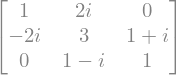

True

In [13]:
A = Matrix([[1,2*I,0],
           [-2*I,3,1+I],
           [0,1-I,1]])

display(A, A.is_hermitian)

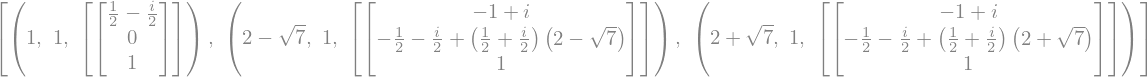

In [14]:
# egenvektorerne findes
ev = A.eigenvects()
ev

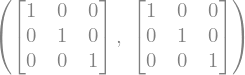

In [15]:
U = Matrix.hstack(*[ev[i][2][0].normalized() for i in range(3)])

# U er en unitær matrix
simplify(U*U.H), simplify(U.H*U)

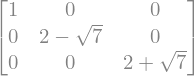

In [16]:
simplify(U.H*A*U)

## Diagonalisering af en symmetrisk matrix ved ortogonal substitution

Hvis man løber ind i et tilfælde hvor en egenværdi for en symmetrisk matrix har $am(\lambda) = gm(\lambda) \ge 2$, kan vi ikke være sikre på at de første egenvektorer vi finder er ortogonale. Spektralsætingen sikre os stadig at der findes en orthonormal base båstende af egenvektorer.Betragt eksempelvis den symmetriske matrix $A$ givet ved

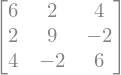

In [17]:
A = Matrix([[6,2,4],[2,9,-2],[4,-2,6]])
A

Her ser vi at en egenværdi har algebraisk multiplicitet 2 og to egenvektorer

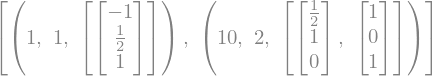

In [18]:
A.eigenvects()

Så hvis vi, som før, nøjes med at normaliserer egenvektorene

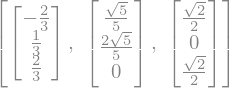

In [19]:
v_1 = Matrix([-1,Rational(1,2),1])
v_2 = Matrix([Rational(1,2),1,0])
v_3 = Matrix([1,0,1])
[v.normalized() for v in [v_1,v_2,v_3]]

*(Eller i et "go" uden at skulle skrive $u$-vektorerne ind manuelt):*

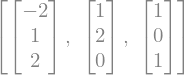

	   | (normalize)
	   q


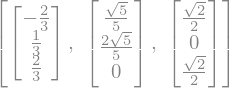

In [20]:
V, Lamda = A.diagonalize()
[v_1,v_2,v_3] = [V.col(k) for k in range(3)]        # hver søjle i V tilgås og gemmes som vektor
q_1, q_2, q_3 = [v.normalized() for v in [v_1, v_2, v_3]]
display([v_1,v_2,v_3])
print('\t   | (normalize)')
print('\t   q')
display([q_1,q_2,q_3])

og opstiller den ønskede $Q$-matrix med dem

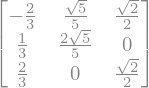

In [21]:
Q = Matrix.hstack(q_1,q_2,q_3)
Q

kan vi se at matricen desværre ikke er reel ortogonal:

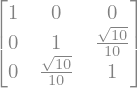

In [22]:
Q.T * Q

da de to sidste søjler i $Q$ ikke er ortogonale på hinanden!

Heldigvis kan vi dog bruge en metode i har lært, GramSchmidt-algoritmen i disse tilfælde. For egenvektorer med ens egenværdier udføres GramSchmidt, og egenvektorer hvor $am(\lambda) = 1$ udføres standard normalisering:

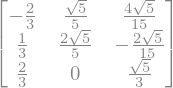

In [23]:
q_1 = v_1.normalized()
q_2, q_3 = GramSchmidt([v_2, v_3], orthonormal=True)
Q = Matrix.hstack(q_1,q_2,q_3)
Q

Rækkefølgen af egenværdierne i diagonalmatricen $\Lambda$ er bestemt af rækkefølgen af egenvektorer, som vi valgte. Den er lig $V^{-1} A V$ og givet ved:

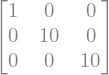

In [24]:
Lamda

Lad os tjekke at Gram-Schmidt ikke har ændret ved $\Lambda$. Vi skriver:

In [25]:
Lamda == Q.T*A*Q

True

Som forventet er $\Lambda = V^{-1} A V = Q^T A Q$. Men husk at denne GramSchmidt-metode kun behøves brugt når matricen opfylder spektralsætningen (igen for reelle matricer Thm. 2.8.5 og for komplekse matricer Thm. 2.8.9), men har egenværdier med $am(\lambda) = gm(\lambda) \ge 2$.

## Positiv (semi-)definite matricer

Positivt (semi-)definite matricer har nogle egenskaber der gør dem endnu nemmere at regne med. De er desuden hermitiske og opfylder derfor alt der er gennemgået i denne demo. Det er mest noget man lægger mærke til ved manipulationer af matricer, og derfor ikke noget vi nødvendigvis bemærker når vi anvender `SymPy`/CAS. `SymPy` er dog udstyret med to funktioner der gør det nemt at finde ud af hvorvidt en matrix er positivt definit eller positivt semidefinit.

Betragt de to hermitiske matricer $A,B \in M_4(\mathbb{R})$.

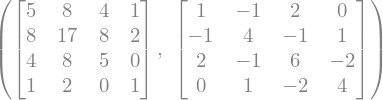

In [26]:
A = Matrix([[5,8,4,1],
            [8,17,8,2],
            [4,8,5,0],
            [1,2,0,1]])

B = Matrix([[1,-1,2,0],
            [-1,4,-1,1],
            [2,-1,6,-2],
            [0,1,-2,4]])

A,B

In [27]:
A.is_positive_definite, B.is_positive_definite

(False, True)

Vi kunne også forsøge at bevise at $B$ er positivt definit ved simuleret håndregning. En strategi kunne være at bevise axiom (i) i definition 2.9.1, men da dette ville kræve at vi tester for alle vektorer i $\mathbb{R}^4$ er dette ikke oplagt i `SymPy`. I stedet vil thm 2.9.1 (ii) være lettere at arbejde med. Altså vil vi vise at $B$ har strengt positive egenværdier. Det viser sig dog at være et udfordrende tilfælde.

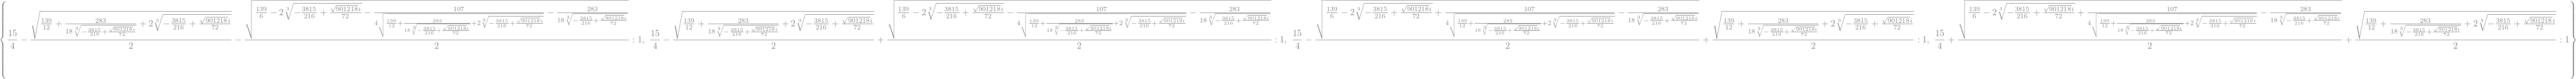

In [28]:
B.eigenvals()

Det er ikke særlig tydeligt at disse egenværdier skulle være positive, og de ser oven i købet ud til at være komplekse. Vi kan i stedet prøve at kigge på de nummeriske værdier.

In [29]:
for eigenval in B.eigenvals():
    print(eigenval.evalf(15))

3.10533934717727 - 1.39585627777974e-29*I
0.0216077757381638 + 2.41351647874518e-30*I
8.26801827124053 + 3.58918706790694e-31*I
3.60503460584404 + 1.11861275922615e-29*I


Her kunne man argumentere for at imaginærdelene er så tilpas små at de kan antages at være 0, og være tilfreds. Det er dog hverken et særlig godt eller tydeligt bevis. 

Man kan være heldig at have en matrix med pænere egenværdier. `SymPy`s funktioner kan altså bruges til at kontrolere, men vi anbefaler at beviser udføres i hånden i stedet.